### XGB
* meta feature: 불용어 개수, 단어 개수, 문장 부호 개수
* text feature: 단어 등장 빈도 수 word2vec 문장 자체에서 추출한 feature

In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings("ignore")

preprocessing_data = pd.read_pickle("final_data_end_0429.pkl")
preprocessing_data.shape

(17556, 22)

In [2]:
hanspell_content = pd.read_pickle("end_hanspell.pkl")  # 데이터 저장 

In [3]:
import pandas as pd

origin_data = pd.read_pickle("../../petition/petition_total_data.pkl")
origin_data.shape

(40054, 10)

In [4]:
origin_data.columns

Index(['code', 'sdays', 'edays', 'title', 'count', 'content', 'category',
       'progress', 'link', 'person'],
      dtype='object')

In [5]:
data = pd.merge(preprocessing_data, origin_data[['code','content']], how = 'inner', on = ['code'])
data = pd.merge(data, hanspell_content[['code','pre_content']], how = 'inner', on = 'code')

In [6]:
data.isnull().sum()

code                   0
title                  0
count                  0
content_x              0
category               0
progress               0
summary_content_end    0
title_len              0
doc_len                0
content_noun           0
content_verb           0
content_adj            0
sdays                  0
edays                  0
emotion                0
title_token            0
total_token            0
top_keyword            0
count_noun             0
count_verb             0
count_adj              0
target                 0
content_y              0
pre_content            0
dtype: int64

In [7]:
import datetime
data = data[data['sdays']<datetime.datetime.strptime("2021.03.01","%Y.%m.%d")]

In [8]:
print(origin_data['sdays'].min())
print(origin_data['sdays'].max())

2019-03-01 00:00:00
2021-03-04 00:00:00


In [9]:
print(preprocessing_data['sdays'].min())
print(preprocessing_data['sdays'].max())

2019-04-01 00:00:00
2021-03-19 00:00:00


In [10]:
print(data['sdays'].min())
print(data['sdays'].max())

2019-04-01 00:00:00
2021-02-26 00:00:00


In [11]:
data['count'].min()

107.0

In [12]:
data[data['count'] == data['count'].max()]

,code,title,count,content_x,category,progress,summary_content_end,title_len,doc_len,content_noun,...,emotion,title_token,total_token,top_keyword,count_noun,count_verb,count_adj,target,content_y,pre_content
62,586819,텔레그램 n번방 용의자 신상공개 및 포토라인 세워주세요,2715626.0,오늘 검거되었다고 합니다타인의 수치심과 어린 학생들을지옥으로 몰아넣은 가해자를포토라...,안전/환경,답변완료,오늘 검거되었다고 합니다 타인의 수치심과 어린 학생들을 지옥으로 몰아넣은 가해자를 ...,30,306,"[오늘, 검거, 합, 니다, 타인, 수치심, 학생, 지옥, 가해자, 포토, 라인, ...",...,dontknow,"[텔레그램, 번, 방, 용의자, 신상, 공개, 포토, 라인]","[텔레그램, 번, 방, 용의자, 신상, 공개, 포토, 라인, 오늘, 검거, 합, 니...","{'포토': 0.497, '라인': 0.358, '악마': 0.256, '수치심':...",56,12,2,1,오늘 검거되었다고 합니다타인의 수치심과 어린 학생들을지옥으로 몰아넣은 가해자를포토라...,오늘 검거되었다고 합니다 타인의 수치심과 어린 학생들을 지옥으로 몰아넣은 가해자를 ...


In [13]:
data['count'] = pd.to_numeric(data['count'])

In [14]:
count_lst = []
for x in data['count']:
    if x < 200000:
        count_lst.append(0)
    else:
        count_lst.append(1)

In [15]:
data['target'] = count_lst

* 300, 600, 1500, 5000

In [16]:
'''
data['target'] = pd.qcut(data['count'],5, labels = [0,1,2,3,4])

for i in range(len(data)):
    if data['count'][i] < 300 :
        data['target'][i] = 0
    if data['count'][i] >= 300 and data['count'][i] < 600 :
        data['target'][i] = 1
    if data['count'][i] >= 600 and data['count'][i] < 1200:
        data['target'][i] = 2
    if data['count'][i] >= 1200 and data['count'][i] < 4000:
        data['target'][i] = 3
    if data['count'][i] >= 4000:
        data['target'][i] = 4
        
'''

"\ndata['target'] = pd.qcut(data['count'],5, labels = [0,1,2,3,4])\n\nfor i in range(len(data)):\n    if data['count'][i] < 300 :\n        data['target'][i] = 0\n    if data['count'][i] >= 300 and data['count'][i] < 600 :\n        data['target'][i] = 1\n    if data['count'][i] >= 600 and data['count'][i] < 1200:\n        data['target'][i] = 2\n    if data['count'][i] >= 1200 and data['count'][i] < 4000:\n        data['target'][i] = 3\n    if data['count'][i] >= 4000:\n        data['target'][i] = 4\n        \n"

In [17]:
data['target'].value_counts()

0    17033
1      136
Name: target, dtype: int64

In [18]:
data.groupby(['target'])['count'].max()

target
0     190997.0
1    2715626.0
Name: count, dtype: float64

In [19]:
data.isnull().sum()

code                   0
title                  0
count                  0
content_x              0
category               0
progress               0
summary_content_end    0
title_len              0
doc_len                0
content_noun           0
content_verb           0
content_adj            0
sdays                  0
edays                  0
emotion                0
title_token            0
total_token            0
top_keyword            0
count_noun             0
count_verb             0
count_adj              0
target                 0
content_y              0
pre_content            0
dtype: int64

In [20]:
data2 = data[data['count']>=data['count'].mean()]

In [21]:
data_0 = data[data['target']==0]
data_1 = data[data['target']!=0]

data_0 = data_0.sample(n=1000, random_state = 42)
final_data = pd.concat([data_0, data_1], axis = 0)

In [22]:
final_data = pd.get_dummies(final_data,columns = ['emotion'])

In [23]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(final_data, test_size = 0.2, stratify = final_data['target'],shuffle = True, random_state = 42)

In [24]:
train_df['target'].value_counts()

0    799
1    109
Name: target, dtype: int64

In [25]:
train_df.isnull().sum()

code                   0
title                  0
count                  0
content_x              0
category               0
progress               0
summary_content_end    0
title_len              0
doc_len                0
content_noun           0
content_verb           0
content_adj            0
sdays                  0
edays                  0
title_token            0
total_token            0
top_keyword            0
count_noun             0
count_verb             0
count_adj              0
target                 0
content_y              0
pre_content            0
emotion_angry          0
emotion_disgust        0
emotion_dontknow       0
emotion_fear           0
emotion_sad            0
dtype: int64

### 사용할 feature 선택

In [26]:
## Number of words in the text ##
train_df["num_words"] = train_df["pre_content"].apply(lambda x: len(str(x).split()))
test_df["num_words"] = test_df["pre_content"].apply(lambda x: len(str(x).split()))

In [27]:
## Number of unique words in the text ##
train_df["num_unique_words"] = train_df["pre_content"].apply(lambda x: len(set(str(x).split())))
test_df["num_unique_words"] = test_df["pre_content"].apply(lambda x: len(set(str(x).split())))

In [28]:
## 기호 개수 
import string
train_df["num_punctuations"] =train_df['content_y'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
test_df["num_punctuations"] =test_df['content_y'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

In [29]:
# 평균 단어 개수 
train_df["mean_word_len"] = train_df["pre_content"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
test_df["mean_word_len"] = test_df["pre_content"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [30]:
# 평균 단어 개수 
train_df["title_mean_word_len"] = train_df["title"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
test_df["title_mean_word_len"] = test_df["title"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [31]:
##additional
train_df[","] = train_df["content_y"].apply(lambda x: np.mean([len(w) for w in str(x).split(",")]))
test_df[","] = test_df["content_y"].apply(lambda x: np.mean([len(w) for w in str(x).split(",")]))

train_df[";"] = train_df["content_y"].apply(lambda x: np.mean([len(w) for w in str(x).split(";")]))
test_df[";"] = test_df["content_y"].apply(lambda x: np.mean([len(w) for w in str(x).split(";")]))

train_df['\"'] = train_df["content_y"].apply(lambda x: np.mean([len(w) for w in str(x).split('\"')]))
test_df['\"'] = test_df["content_y"].apply(lambda x: np.mean([len(w) for w in str(x).split('\"')]))

train_df["..."] = train_df["content_y"].apply(lambda x: np.mean([len(w) for w in str(x).split("...")]))
test_df["..."] = test_df["content_y"].apply(lambda x: np.mean([len(w) for w in str(x).split("...")]))

train_df["?"] = train_df["content_y"].apply(lambda x: np.mean([len(w) for w in str(x).split("?")]))
test_df["?"] = test_df["content_y"].apply(lambda x: np.mean([len(w) for w in str(x).split("?")]))

train_df["!"] = train_df["content_y"].apply(lambda x: np.mean([len(w) for w in str(x).split("!")]))
test_df["!"] = test_df["content_y"].apply(lambda x: np.mean([len(w) for w in str(x).split("!")]))

train_df["."] = train_df["content_y"].apply(lambda x: np.mean([len(w) for w in str(x).split(".")]))
test_df["."] = test_df["content_y"].apply(lambda x: np.mean([len(w) for w in str(x).split(".")]))

train_df[":"] = train_df["content_y"].apply(lambda x: np.mean([len(w) for w in str(x).split(":")]))
test_df[":"] = test_df["content_y"].apply(lambda x: np.mean([len(w) for w in str(x).split(":")]))

train_df["*"] = train_df["content_y"].apply(lambda x: np.mean([len(w) for w in str(x).split("*")]))
test_df["*"] = test_df["content_y"].apply(lambda x: np.mean([len(w) for w in str(x).split("*")]))

train_df["-"] = train_df["content_y"].apply(lambda x: np.mean([len(w) for w in str(x).split("-")]))
test_df["-"] = test_df["content_y"].apply(lambda x: np.mean([len(w) for w in str(x).split("-")]))

train_df["■"] = train_df["content_y"].apply(lambda x: np.mean([len(w) for w in str(x).split("■")]))
test_df["■"] = test_df["content_y"].apply(lambda x: np.mean([len(w) for w in str(x).split("■")]))

train_df["★"] = train_df["content_y"].apply(lambda x: np.mean([len(w) for w in str(x).split("★")]))
test_df["★"] = test_df["content_y"].apply(lambda x: np.mean([len(w) for w in str(x).split("★")]))

train_df["@"] = train_df["content_y"].apply(lambda x: np.mean([len(w) for w in str(x).split("@")]))
test_df["@"] = test_df["content_y"].apply(lambda x: np.mean([len(w) for w in str(x).split("@")]))


train_df["please"] = train_df["content_y"].apply(lambda x: np.mean([len(w) for w in str(x).split("부탁")]))
test_df["please"] = test_df["content_y"].apply(lambda x: np.mean([len(w) for w in str(x).split("부탁")]))


train_df["chu"] = train_df["content_y"].apply(lambda x: np.mean([len(w) for w in str(x).split("청원")]))
test_df["chu"] = test_df["content_y"].apply(lambda x: np.mean([len(w) for w in str(x).split("청원")]))


train_df["moon"] = train_df["content_y"].apply(lambda x: np.mean([len(w) for w in str(x).split("대통령")]))
test_df["moon"] = test_df["content_y"].apply(lambda x: np.mean([len(w) for w in str(x).split("대통령")]))

train_df["log_doc"] = np.log(train_df["doc_len"])
test_df["log_doc"] = np.log(test_df["doc_len"])

In [32]:
train_df["count_noun"] = np.sqrt(train_df["count_noun"])
train_df["count_verb"] = np.sqrt(train_df["count_verb"])
train_df["count_adj"] = np.sqrt(train_df["count_adj"])


test_df["count_noun"] = np.sqrt(test_df["count_noun"])
test_df["count_verb"] = np.sqrt(test_df["count_verb"])
test_df["count_adj"] = np.sqrt(test_df["count_adj"])

In [33]:
train_df.isnull().sum()

code                   0
title                  0
count                  0
content_x              0
category               0
progress               0
summary_content_end    0
title_len              0
doc_len                0
content_noun           0
content_verb           0
content_adj            0
sdays                  0
edays                  0
title_token            0
total_token            0
top_keyword            0
count_noun             0
count_verb             0
count_adj              0
target                 0
content_y              0
pre_content            0
emotion_angry          0
emotion_disgust        0
emotion_dontknow       0
emotion_fear           0
emotion_sad            0
num_words              0
num_unique_words       0
num_punctuations       0
mean_word_len          0
title_mean_word_len    0
,                      0
;                      0
"                      0
...                    0
?                      0
!                      0
.                      0


In [34]:
test_df.isnull().sum()

code                   0
title                  0
count                  0
content_x              0
category               0
progress               0
summary_content_end    0
title_len              0
doc_len                0
content_noun           0
content_verb           0
content_adj            0
sdays                  0
edays                  0
title_token            0
total_token            0
top_keyword            0
count_noun             0
count_verb             0
count_adj              0
target                 0
content_y              0
pre_content            0
emotion_angry          0
emotion_disgust        0
emotion_dontknow       0
emotion_fear           0
emotion_sad            0
num_words              0
num_unique_words       0
num_punctuations       0
mean_word_len          0
title_mean_word_len    0
,                      0
;                      0
"                      0
...                    0
?                      0
!                      0
.                      0


In [35]:
test_df.shape

(228, 50)

In [36]:
pd.set_option("display.max_columns",100)
train_df

,code,title,count,content_x,category,progress,summary_content_end,title_len,doc_len,content_noun,content_verb,content_adj,sdays,edays,title_token,total_token,top_keyword,count_noun,count_verb,count_adj,target,content_y,pre_content,emotion_angry,emotion_disgust,emotion_dontknow,emotion_fear,emotion_sad,num_words,num_unique_words,num_punctuations,mean_word_len,title_mean_word_len,",",;,"""",...,?,!,.,:,*,-,■,★,@,please,chu,moon,log_doc
9915,589340,"용산 정비창 부지 8,000호 주택공급 계획에 대한 재검토 요청",494.0,"최근 용산정비창 부지에 주택 8,000세대 건립 계획이 발표되어 다양한 여론이 형성...",교통/건축/국토,청원종료,최근 용산정비창 부지에 주택 8 000세대 건립 계획이 발표되어 다양한 여론이 형성...,35,2170,"[최근, 용산정, 비창, 부지, 주택, 세대, 건립, 계획, 발표, 여론, 형성, ...","[있, 보, 보, 앞서, 내세우, 되, 나아가, 통하, 돌아가, 엮이, 있, 갚, ...","[없, 같, 같, 뛰어나, 가깝, 없, 그렇, 많, 어떻, 아름답, 많, 없, 귀하...",2020-05-29,2020-06-28,"[용산, 정, 비창, 부지, 호, 주택, 공급, 계획, 재검토, 요청]","[용산, 정, 비창, 부지, 호, 주택, 공급, 계획, 재검토, 요청, 최근, 용산...","{'용산': 0.391, '국제': 0.31, '입지': 0.266, '부지': 0...",18.654758,7.810250,4.242641,0,"최근 용산정비창 부지에 주택 8,000세대 건립 계획이 발표되어 다양한 여론이 형성...",최근 용산정비창 부지에 주택 8 000세대 건립 계획이 발표되어 다양한 여론이 형성...,1,0,0,0,0,519,439,62,3.165703,3.000000,97.681818,2170.0,2170.000000,2170.000,216.100,2170.000000,66.843750,2170.000000,2170.000000,1084.500000,2170.0,2170.000000,2170.0,2170.000000,2170.000000,2170.000000,7.682482
11931,591390,양육비 대지급제 시행을 촉구합니다,362.0,저는 남편의 불륜으로 이혼예정인 워킹맘입니다.사춘기 아이둘을 둔 엄마이기도 합니다....,육아/교육,청원종료,저는 남편의 불륜으로 이혼 예정인 워킹맘입니다 사춘기 아이 둘을 둔 엄마이기도 합니...,18,1338,"[남편, 불륜, 이혼, 예정, 워킹맘, 사춘기, 아이, 엄마, 그간, 남편, 불륜,...","[두, 덮, 모르, 위하, 지키, 속이, 있, 걸, 헤어지, 끊, 돌아오, 보, 참...","[그렇, 크, 없, 어떻, 없, 어렵, 없, 어떻]",2020-08-03,2020-09-02,"[양육비, 대지급, 시행, 촉구]","[양육비, 대지급, 시행, 촉구, 남편, 불륜, 이혼, 예정, 워킹맘, 사춘기, 아...","{'양육비': 0.52, '한부모': 0.441, '이혼': 0.213, '불륜':...",14.106736,7.810250,2.828427,0,저는 남편의 불륜으로 이혼예정인 워킹맘입니다.사춘기 아이둘을 둔 엄마이기도 합니다....,저는 남편의 불륜으로 이혼 예정인 워킹맘입니다. 사춘기 아이 둘을 둔 엄마이기도 합...,0,1,0,0,0,343,290,44,3.128280,3.750000,1338.000000,1338.0,1338.000000,332.250,166.375,1338.000000,37.257143,1338.000000,1338.000000,1338.000000,1338.0,1338.000000,1338.0,668.000000,1338.000000,444.000000,7.198931
8761,588168,특수상권의 자영업자는 두번 죽습니다.,205.0,아울렛 안에서 음식점업을 하고 있는 소상공자영업자 입니다. 매출이 반토막보다 더한 ...,보건복지,청원종료,아웃렛 안에서 음식점 업을 하고 있는 소상 공자 영업자입니다 매출이 반 토막보다 더...,20,291,"[음식점, 업, 상공, 자영업자, 매출, 토막, 수준, 사정, 국민, 모두, 조금,...","[있, 더하, 줄어들, 그러, 참, 버티, 버티, 되, 찾, 죽이, 처하]","[힘들, 힘들, 같, 같, 작, 힘들]",2020-04-19,2020-05-19,"[특수, 상권, 자영업자, 번]","[특수, 상권, 자영업자, 번, 음식점, 업, 상공, 자영업자, 매출, 토막, 수준...","{'매장': 0.52, '상공': 0.384, '특수': 0.369, '자영업자':...",6.082763,3.316625,2.449490,0,아울렛 안에서 음식점업을 하고 있는 소상공자영업자 입니다. 매출이 반토막보다 더한 ...,아웃렛 안에서 음식점 업을 하고 있는 소상 공자 영업자입니다. 매출이 반 토막보다 ...,0,0,0,0,1,72,66,5,3.138889,4.250000,291.000000,291.0,291.000000,291.000,291.000,291.000000,47.666667,291.000000,291.000000,291.000000,291.0,291.000000,291.0,291.000000,291.000000,291.000000,5.673323
16730,596255,"""가야고분군"" 세계유산 등재신청에서 남원 유곡리와 두락리고분군은 제외하여 주십시요",128.0,"문재인 대통령님께 지난 해 9월 10일, 문화재청 문화재위원회 세계유산분과 제5차 ...",문화/예술/체육/언론,청원종료,문재인 대통령님께 지난해 9월 10일 문화재청 문화재위원회 세계유산분과 제5차 회의...,45,2278,"[문재인, 대통령, 9월 10일, 문화재, 청, 문화재, 위원회, 세계유산, 분, ...","[지나, 지니, 되, 반하, 여기, 지나, 나타나, 보이, 두, 보, 맞, 이루, ...","[크, 많, 그렇, 다르, 없, 그렇, 넓, 좋, 멀, 안타깝, 없]",2021-02-05,2021-03-07,"[가야, 고분군, 세계유산, 등재, 신청, 남원, 유, 곡리, 두락, 리, 고분군,...","[가야, 고분군, 세계유산, 등재, 신청, 남원, 유, 곡리, 두락, 리, 고분군,...","{'가야': 0.589, '남원': 0.327, '백제': 0.302, '등재': ...",20.663978,6.082763,3.316625,0,"문재인 대통령님께 지난 해 9월 10일, 문화재청 문화재위원회 세계유산분과 제5차 ...",문재인 대통령님께 지난해 9월 10일 문화재청 문화재위원회 세계유산분과 제5차 회의...,1,0,0,0,0,519,417,55,3.281310,4.750000,107.523810,2278.0,454.800000,2278.000,2278.000,2278.000000,125.611111,2278.000000,568.750000,2278.000000,2278.0,2278.000000,2278.0,2278.000000,568.000000,453.200000,7.731053
4786,584120,국가어항 슬롭웨이 만큼은 레져보트인이 사용할수 있게 해주세요,552.0,우리나라 레져보트 낚시인구가 급속하게 증가하는 추세이며.그로인해 레져보트 산업도 발...,농산어촌,청원종료,우리나라 레저보트 낚시 인구가 급속하게 증가하는 추세이며 그로 인해 레저보트 산업...,33,653,"[우리나라, 레져, 보트, 낚시, 인구, 급속, 증가, 추세, 레져, 보트, 산업,...","[인하, 되, 위하, 되, 있, 있, 즐기, 있, 있, 대하, 갖, 가, 대하, 쌓...","[시, 없, 시]",2019-12-20,2020-01-19,"[국가, 어항, 

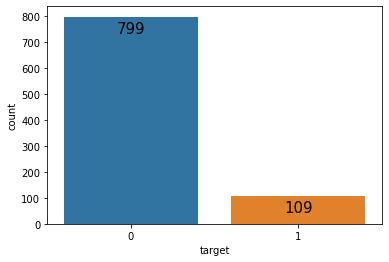

In [37]:
import seaborn as sns
splot =  sns.countplot(train_df['target'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

### 변수 관계 확인

<AxesSubplot:xlabel='target', ylabel='doc_len'>

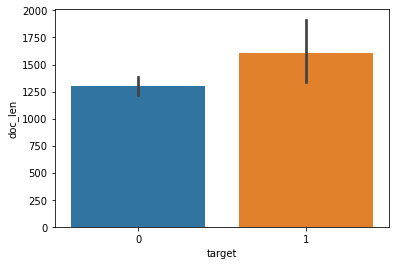

In [38]:
sns.barplot(train_df['target'],train_df['doc_len'])

In [39]:
'''
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import seaborn as sns

fig, ax = plt.subplots(figsize = (12,8))

splot =  sns.countplot(sorted(train_df['emotion']))
plt.title("글의 감정 분포", fontsize = 12)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
'''

'\nimport matplotlib.pyplot as plt\nfrom matplotlib import font_manager, rc\nfont_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()\nrc(\'font\', family=font_name)\nimport seaborn as sns\n\nfig, ax = plt.subplots(figsize = (12,8))\n\nsplot =  sns.countplot(sorted(train_df[\'emotion\']))\nplt.title("글의 감정 분포", fontsize = 12)\nfor p in splot.patches:\n    splot.annotate(format(p.get_height(), \'.0f\'), \n                   (p.get_x() + p.get_width() / 2., p.get_height()), \n                   ha = \'center\', va = \'center\', \n                   size=15,\n                   xytext = (0, -12), \n                   textcoords = \'offset points\')\n'

In [40]:
'''
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


fig, ax = plt.subplots(figsize = (12,8))

pd.crosstab(train_df['target'], train_df['emotion']).plot(kind = 'bar', ax = ax)
ax.legend(fontsize=12, loc='upper left') # legend position
plt.title("target 별 글의 감정", fontsize = 16)
plt.show()
'''

'\nfrom matplotlib import font_manager, rc\nfont_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()\nrc(\'font\', family=font_name)\n\n\nfig, ax = plt.subplots(figsize = (12,8))\n\npd.crosstab(train_df[\'target\'], train_df[\'emotion\']).plot(kind = \'bar\', ax = ax)\nax.legend(fontsize=12, loc=\'upper left\') # legend position\nplt.title("target 별 글의 감정", fontsize = 16)\nplt.show()\n'

* target 별로 구분되는 특징이 없음.

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
train_doc_lst = [' '.join(x) for x in train_df['total_token']]
test_doc_lst = [' '.join(x) for x in test_df['total_token']]

In [43]:
tfidf = TfidfVectorizer(max_features = 300)

full_tfidf = tfidf.fit_transform(train_doc_lst)
train_tfidf = tfidf.transform(train_doc_lst)
test_tfidf = tfidf.transform(test_doc_lst)
print(train_tfidf.shape,test_tfidf.shape)

(908, 300) (228, 300)


In [44]:
total_test_tfidf = []
for i in range(len(test_doc_lst)):
    total_test_tfidf.append(list(reversed(sorted(test_tfidf.toarray()[i])))[0:15])

In [45]:
print(len(total_test_tfidf))

228


In [46]:
total_train_tfidf = []
for i in range(len(train_doc_lst)):
    total_train_tfidf.append(list(reversed(sorted(train_tfidf.toarray()[i])))[0:15])

In [47]:
print(len(total_train_tfidf))

908


In [48]:
train_tfidf_df = pd.DataFrame(total_train_tfidf)
test_tfidf_df = pd.DataFrame(total_test_tfidf)

In [49]:
train_df

,code,title,count,content_x,category,progress,summary_content_end,title_len,doc_len,content_noun,content_verb,content_adj,sdays,edays,title_token,total_token,top_keyword,count_noun,count_verb,count_adj,target,content_y,pre_content,emotion_angry,emotion_disgust,emotion_dontknow,emotion_fear,emotion_sad,num_words,num_unique_words,num_punctuations,mean_word_len,title_mean_word_len,",",;,"""",...,?,!,.,:,*,-,■,★,@,please,chu,moon,log_doc
9915,589340,"용산 정비창 부지 8,000호 주택공급 계획에 대한 재검토 요청",494.0,"최근 용산정비창 부지에 주택 8,000세대 건립 계획이 발표되어 다양한 여론이 형성...",교통/건축/국토,청원종료,최근 용산정비창 부지에 주택 8 000세대 건립 계획이 발표되어 다양한 여론이 형성...,35,2170,"[최근, 용산정, 비창, 부지, 주택, 세대, 건립, 계획, 발표, 여론, 형성, ...","[있, 보, 보, 앞서, 내세우, 되, 나아가, 통하, 돌아가, 엮이, 있, 갚, ...","[없, 같, 같, 뛰어나, 가깝, 없, 그렇, 많, 어떻, 아름답, 많, 없, 귀하...",2020-05-29,2020-06-28,"[용산, 정, 비창, 부지, 호, 주택, 공급, 계획, 재검토, 요청]","[용산, 정, 비창, 부지, 호, 주택, 공급, 계획, 재검토, 요청, 최근, 용산...","{'용산': 0.391, '국제': 0.31, '입지': 0.266, '부지': 0...",18.654758,7.810250,4.242641,0,"최근 용산정비창 부지에 주택 8,000세대 건립 계획이 발표되어 다양한 여론이 형성...",최근 용산정비창 부지에 주택 8 000세대 건립 계획이 발표되어 다양한 여론이 형성...,1,0,0,0,0,519,439,62,3.165703,3.000000,97.681818,2170.0,2170.000000,2170.000,216.100,2170.000000,66.843750,2170.000000,2170.000000,1084.500000,2170.0,2170.000000,2170.0,2170.000000,2170.000000,2170.000000,7.682482
11931,591390,양육비 대지급제 시행을 촉구합니다,362.0,저는 남편의 불륜으로 이혼예정인 워킹맘입니다.사춘기 아이둘을 둔 엄마이기도 합니다....,육아/교육,청원종료,저는 남편의 불륜으로 이혼 예정인 워킹맘입니다 사춘기 아이 둘을 둔 엄마이기도 합니...,18,1338,"[남편, 불륜, 이혼, 예정, 워킹맘, 사춘기, 아이, 엄마, 그간, 남편, 불륜,...","[두, 덮, 모르, 위하, 지키, 속이, 있, 걸, 헤어지, 끊, 돌아오, 보, 참...","[그렇, 크, 없, 어떻, 없, 어렵, 없, 어떻]",2020-08-03,2020-09-02,"[양육비, 대지급, 시행, 촉구]","[양육비, 대지급, 시행, 촉구, 남편, 불륜, 이혼, 예정, 워킹맘, 사춘기, 아...","{'양육비': 0.52, '한부모': 0.441, '이혼': 0.213, '불륜':...",14.106736,7.810250,2.828427,0,저는 남편의 불륜으로 이혼예정인 워킹맘입니다.사춘기 아이둘을 둔 엄마이기도 합니다....,저는 남편의 불륜으로 이혼 예정인 워킹맘입니다. 사춘기 아이 둘을 둔 엄마이기도 합...,0,1,0,0,0,343,290,44,3.128280,3.750000,1338.000000,1338.0,1338.000000,332.250,166.375,1338.000000,37.257143,1338.000000,1338.000000,1338.000000,1338.0,1338.000000,1338.0,668.000000,1338.000000,444.000000,7.198931
8761,588168,특수상권의 자영업자는 두번 죽습니다.,205.0,아울렛 안에서 음식점업을 하고 있는 소상공자영업자 입니다. 매출이 반토막보다 더한 ...,보건복지,청원종료,아웃렛 안에서 음식점 업을 하고 있는 소상 공자 영업자입니다 매출이 반 토막보다 더...,20,291,"[음식점, 업, 상공, 자영업자, 매출, 토막, 수준, 사정, 국민, 모두, 조금,...","[있, 더하, 줄어들, 그러, 참, 버티, 버티, 되, 찾, 죽이, 처하]","[힘들, 힘들, 같, 같, 작, 힘들]",2020-04-19,2020-05-19,"[특수, 상권, 자영업자, 번]","[특수, 상권, 자영업자, 번, 음식점, 업, 상공, 자영업자, 매출, 토막, 수준...","{'매장': 0.52, '상공': 0.384, '특수': 0.369, '자영업자':...",6.082763,3.316625,2.449490,0,아울렛 안에서 음식점업을 하고 있는 소상공자영업자 입니다. 매출이 반토막보다 더한 ...,아웃렛 안에서 음식점 업을 하고 있는 소상 공자 영업자입니다. 매출이 반 토막보다 ...,0,0,0,0,1,72,66,5,3.138889,4.250000,291.000000,291.0,291.000000,291.000,291.000,291.000000,47.666667,291.000000,291.000000,291.000000,291.0,291.000000,291.0,291.000000,291.000000,291.000000,5.673323
16730,596255,"""가야고분군"" 세계유산 등재신청에서 남원 유곡리와 두락리고분군은 제외하여 주십시요",128.0,"문재인 대통령님께 지난 해 9월 10일, 문화재청 문화재위원회 세계유산분과 제5차 ...",문화/예술/체육/언론,청원종료,문재인 대통령님께 지난해 9월 10일 문화재청 문화재위원회 세계유산분과 제5차 회의...,45,2278,"[문재인, 대통령, 9월 10일, 문화재, 청, 문화재, 위원회, 세계유산, 분, ...","[지나, 지니, 되, 반하, 여기, 지나, 나타나, 보이, 두, 보, 맞, 이루, ...","[크, 많, 그렇, 다르, 없, 그렇, 넓, 좋, 멀, 안타깝, 없]",2021-02-05,2021-03-07,"[가야, 고분군, 세계유산, 등재, 신청, 남원, 유, 곡리, 두락, 리, 고분군,...","[가야, 고분군, 세계유산, 등재, 신청, 남원, 유, 곡리, 두락, 리, 고분군,...","{'가야': 0.589, '남원': 0.327, '백제': 0.302, '등재': ...",20.663978,6.082763,3.316625,0,"문재인 대통령님께 지난 해 9월 10일, 문화재청 문화재위원회 세계유산분과 제5차 ...",문재인 대통령님께 지난해 9월 10일 문화재청 문화재위원회 세계유산분과 제5차 회의...,1,0,0,0,0,519,417,55,3.281310,4.750000,107.523810,2278.0,454.800000,2278.000,2278.000,2278.000000,125.611111,2278.000000,568.750000,2278.000000,2278.0,2278.000000,2278.0,2278.000000,568.000000,453.200000,7.731053
4786,584120,국가어항 슬롭웨이 만큼은 레져보트인이 사용할수 있게 해주세요,552.0,우리나라 레져보트 낚시인구가 급속하게 증가하는 추세이며.그로인해 레져보트 산업도 발...,농산어촌,청원종료,우리나라 레저보트 낚시 인구가 급속하게 증가하는 추세이며 그로 인해 레저보트 산업...,33,653,"[우리나라, 레져, 보트, 낚시, 인구, 급속, 증가, 추세, 레져, 보트, 산업,...","[인하, 되, 위하, 되, 있, 있, 즐기, 있, 있, 대하, 갖, 가, 대하, 쌓...","[시, 없, 시]",2019-12-20,2020-01-19,"[국가, 어항, 

In [50]:
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)



In [51]:
train_df2 = pd.concat([train_df,train_tfidf_df], axis = 1)
train_df2

,code,title,count,content_x,category,progress,summary_content_end,title_len,doc_len,content_noun,content_verb,content_adj,sdays,edays,title_token,total_token,top_keyword,count_noun,count_verb,count_adj,target,content_y,pre_content,emotion_angry,emotion_disgust,emotion_dontknow,emotion_fear,emotion_sad,num_words,num_unique_words,num_punctuations,mean_word_len,title_mean_word_len,",",;,"""",...,?,!,.,:,*,-,■,★,@,please,chu,moon,log_doc,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,589340,"용산 정비창 부지 8,000호 주택공급 계획에 대한 재검토 요청",494.0,"최근 용산정비창 부지에 주택 8,000세대 건립 계획이 발표되어 다양한 여론이 형성...",교통/건축/국토,청원종료,최근 용산정비창 부지에 주택 8 000세대 건립 계획이 발표되어 다양한 여론이 형성...,35,2170,"[최근, 용산정, 비창, 부지, 주택, 세대, 건립, 계획, 발표, 여론, 형성, ...","[있, 보, 보, 앞서, 내세우, 되, 나아가, 통하, 돌아가, 엮이, 있, 갚, ...","[없, 같, 같, 뛰어나, 가깝, 없, 그렇, 많, 어떻, 아름답, 많, 없, 귀하...",2020-05-29,2020-06-28,"[용산, 정, 비창, 부지, 호, 주택, 공급, 계획, 재검토, 요청]","[용산, 정, 비창, 부지, 호, 주택, 공급, 계획, 재검토, 요청, 최근, 용산...","{'용산': 0.391, '국제': 0.31, '입지': 0.266, '부지': 0...",18.654758,7.810250,4.242641,0,"최근 용산정비창 부지에 주택 8,000세대 건립 계획이 발표되어 다양한 여론이 형성...",최근 용산정비창 부지에 주택 8 000세대 건립 계획이 발표되어 다양한 여론이 형성...,1,0,0,0,0,519,439,62,3.165703,3.000000,97.681818,2170.0,2170.000000,2170.000,216.100,2170.000000,66.843750,2170.000000,2170.000000,1084.500000,2170.0,2170.000000,2170.0,2170.000000,2170.000000,2170.000000,7.682482,0.424290,0.400065,0.371941,0.337048,0.313815,0.256219,0.216296,0.133494,0.126287,0.126137,0.118307,0.117249,0.102693,0.077471,0.076537
1,591390,양육비 대지급제 시행을 촉구합니다,362.0,저는 남편의 불륜으로 이혼예정인 워킹맘입니다.사춘기 아이둘을 둔 엄마이기도 합니다....,육아/교육,청원종료,저는 남편의 불륜으로 이혼 예정인 워킹맘입니다 사춘기 아이 둘을 둔 엄마이기도 합니...,18,1338,"[남편, 불륜, 이혼, 예정, 워킹맘, 사춘기, 아이, 엄마, 그간, 남편, 불륜,...","[두, 덮, 모르, 위하, 지키, 속이, 있, 걸, 헤어지, 끊, 돌아오, 보, 참...","[그렇, 크, 없, 어떻, 없, 어렵, 없, 어떻]",2020-08-03,2020-09-02,"[양육비, 대지급, 시행, 촉구]","[양육비, 대지급, 시행, 촉구, 남편, 불륜, 이혼, 예정, 워킹맘, 사춘기, 아...","{'양육비': 0.52, '한부모': 0.441, '이혼': 0.213, '불륜':...",14.106736,7.810250,2.828427,0,저는 남편의 불륜으로 이혼예정인 워킹맘입니다.사춘기 아이둘을 둔 엄마이기도 합니다....,저는 남편의 불륜으로 이혼 예정인 워킹맘입니다. 사춘기 아이 둘을 둔 엄마이기도 합...,0,1,0,0,0,343,290,44,3.128280,3.750000,1338.000000,1338.0,1338.000000,332.250,166.375,1338.000000,37.257143,1338.000000,1338.000000,1338.000000,1338.0,1338.000000,1338.0,668.000000,1338.000000,444.000000,7.198931,0.438849,0.395796,0.358760,0.231779,0.229750,0.199950,0.168115,0.155442,0.149731,0.149731,0.147303,0.144989,0.129855,0.123611,0.108876
2,588168,특수상권의 자영업자는 두번 죽습니다.,205.0,아울렛 안에서 음식점업을 하고 있는 소상공자영업자 입니다. 매출이 반토막보다 더한 ...,보건복지,청원종료,아웃렛 안에서 음식점 업을 하고 있는 소상 공자 영업자입니다 매출이 반 토막보다 더...,20,291,"[음식점, 업, 상공, 자영업자, 매출, 토막, 수준, 사정, 국민, 모두, 조금,...","[있, 더하, 줄어들, 그러, 참, 버티, 버티, 되, 찾, 죽이, 처하]","[힘들, 힘들, 같, 같, 작, 힘들]",2020-04-19,2020-05-19,"[특수, 상권, 자영업자, 번]","[특수, 상권, 자영업자, 번, 음식점, 업, 상공, 자영업자, 매출, 토막, 수준...","{'매장': 0.52, '상공': 0.384, '특수': 0.369, '자영업자':...",6.082763,3.316625,2.449490,0,아울렛 안에서 음식점업을 하고 있는 소상공자영업자 입니다. 매출이 반토막보다 더한 ...,아웃렛 안에서 음식점 업을 하고 있는 소상 공자 영업자입니다. 매출이 반 토막보다 ...,0,0,0,0,1,72,66,5,3.138889,4.250000,291.000000,291.0,291.000000,291.000,291.000,291.000000,47.666667,291.000000,291.000000,291.000000,291.0,291.000000,291.0,291.000000,291.000000,291.000000,5.673323,0.731018,0.524812,0.301879,0.221965,0.180084,0.131738,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,596255,"""가야고분군"" 세계유산 등재신청에서 남원 유곡리와 두락리고분군은 제외하여 주십시요",128.0,"문재인 대통령님께 지난 해 9월 10일, 문화재청 문화재위원회 세계유산분과 제5차 ...",문화/예술/체육/언론,청원종료,문재인 대통령님께 지난해 9월 10일 문화재청 문화재위원회 세계유산분과 제5차 회의...,45,2278,"[문재인, 대통령, 9월 10일, 문화재, 청, 문화재, 위원회, 세계유산, 분, ...","[지나, 지니, 되, 반하, 여기, 지나, 나타나, 보이, 두, 보, 맞, 이루, ...","[크, 많, 그렇, 다르, 없, 그렇, 넓, 좋, 멀, 안타깝, 없]",2021-02-05,2021-03-07,"[가야, 고분군, 세계유산, 등재, 신청, 남원, 유, 곡리, 두락, 리, 고분군,...","[가야, 고분군, 세계유산, 등재, 신청, 남원, 유, 곡리, 두락, 리, 고분군,...","{'가야': 0.589, '남원': 0.327, '백제': 0.302, '등재': ...",20.663978,6.082763,3.316625,0,"문재인 대통령님께 지난 해 9월 10일, 문화재청 문화재위원회 세계유산분과 제5차 ...",문재인 대통령님께 지난해 9월 10일 문화재청 문화재위원회 세계유산분과 제5차 회의...,1,0,0,0,0,519,417,55,3.281310,4.750000,107.523810,2278.0,454.800000,2278.000,2278.000,2278.000000,125.6

In [52]:
train_df = pd.concat([train_df,train_tfidf_df], axis = 1)
test_df = pd.concat([test_df,test_tfidf_df], axis = 1)

In [53]:
train_df.isnull().sum()

code         0
title        0
count        0
content_x    0
category     0
            ..
10           0
11           0
12           0
13           0
14           0
Length: 65, dtype: int64

In [54]:
train_df = train_df.dropna()
test_df = test_df.dropna()

train_df = train_df.reset_index(drop =True) 
test_df = test_df.reset_index(drop =True) 

In [55]:
train_df.to_pickle("train_df.pkl")
test_df.to_pickle("test_df.pkl")

In [56]:
train_y = train_df['target']

cols_to_drop = ['count','progress','doc_len','total_token','category','top_keyword','code', 'pre_content','content_y','content_x','title','summary_content_end','content_noun','content_verb','content_adj','sdays','edays','title_token']
train_X = train_df.drop(cols_to_drop+['target'], axis=1)
test_X = test_df.drop(cols_to_drop+['target'], axis=1)
test_y = test_df['target']

In [57]:
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(908, 46)
(228, 46)
(908,)
(228,)


In [58]:
from imblearn.over_sampling import SMOTE

# 모델설정
sm = SMOTE()

# train데이터를 넣어 복제함
X_resampled, y_resampled = sm.fit_sample(train_X,list(train_y))

In [59]:
train_X.columns

Index([          'title_len',          'count_noun',          'count_verb',
                 'count_adj',       'emotion_angry',     'emotion_disgust',
          'emotion_dontknow',        'emotion_fear',         'emotion_sad',
                 'num_words',    'num_unique_words',    'num_punctuations',
             'mean_word_len', 'title_mean_word_len',                   ',',
                         ';',                   '"',                 '...',
                         '?',                   '!',                   '.',
                         ':',                   '*',                   '-',
                         '■',                   '★',                   '@',
                    'please',                 'chu',                'moon',
                   'log_doc',                     0,                     1,
                           2,                     3,                     4,
                           5,                     6,                     7,
            

In [685]:
test_X.columns

Index([          'title_len',          'count_noun',          'count_verb',
                 'count_adj',       'emotion_angry',     'emotion_disgust',
          'emotion_dontknow',        'emotion_fear',         'emotion_sad',
                 'num_words',    'num_unique_words',    'num_punctuations',
             'mean_word_len', 'title_mean_word_len',                   ',',
                         ';',                   '"',                 '...',
                         '?',                   '!',                   '.',
                         ':',                   '*',                   '-',
                         '■',                   '★',                   '@',
                    'please',                 'chu',                'moon',
                   'log_doc',                     0,                     1,
                           2,                     3,                     4,
                           5,                     6,                     7,
            

In [68]:
import pandas as pd
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score 
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
RNG = 42


metric_names = ['f1', 'roc_auc', 'average_precision', 'accuracy', 'precision', 'recall']
scores_df = pd.DataFrame(index=metric_names, columns=['Random-CV', 'Stratified-CV']) # to store the scores
cv = KFold(n_splits=3)
scv = StratifiedKFold(n_splits=3)
clf = RandomForestClassifier()
for metric in metric_names:
    score1 = cross_val_score(clf, train_X, train_y, scoring=metric, cv=cv).mean()
    score2 = cross_val_score(clf, train_X, train_y, scoring=metric, cv=scv).mean()
    scores_df.loc[metric] = [score1, score2]

In [69]:
scores_df

,Random-CV,Stratified-CV
f1,0.0190476,0.035112
roc_auc,0.560754,0.612837
average_precision,0.20605,0.217743
accuracy,0.882139,0.878857
precision,0.333333,0
recall,0.00980392,0.0185185


In [70]:
len(train_X.columns)

46

In [75]:

class_weight = {1: 0.85,
                0: 0.15}

In [82]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(32, input_dim=46, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_X, train_y, epochs=300, batch_size=64, class_weight= class_weight)


print('Misclassified Samples:', (Y != Y_pred).sum())

Epoch 1/300
15/15 [==============================] - 2s 3ms/step - loss: 182.9652 - accuracy: 0.8884
Epoch 2/300
15/15 [==============================] - 0s 3ms/step - loss: 92.6476 - accuracy: 0.8738
Epoch 3/300
15/15 [==============================] - 0s 2ms/step - loss: 39.4033 - accuracy: 0.4613
Epoch 4/300
15/15 [==============================] - 0s 2ms/step - loss: 25.8313 - accuracy: 0.2752
Epoch 5/300
15/15 [==============================] - 0s 2ms/step - loss: 15.4010 - accuracy: 0.4235
Epoch 6/300
15/15 [==============================] - 0s 2ms/step - loss: 16.6720 - accuracy: 0.3893
Epoch 7/300
15/15 [==============================] - 0s 2ms/step - loss: 15.8395 - accuracy: 0.4169
Epoch 8/300
15/15 [==============================] - 0s 3ms/step - loss: 13.6230 - accuracy: 0.4190
Epoch 9/300
15/15 [==============================] - 0s 3ms/step - loss: 11.0071 - accuracy: 0.6076
Epoch 10/300
15/15 [==============================] - 0s 2ms/step - loss: 6.8852 - accuracy: 0.6746

15/15 [==============================] - 0s 2ms/step - loss: 0.3350 - accuracy: 0.6626
Epoch 83/300
15/15 [==============================] - 0s 2ms/step - loss: 2.9383 - accuracy: 0.3343
Epoch 84/300
15/15 [==============================] - 0s 2ms/step - loss: 1.1393 - accuracy: 0.6916
Epoch 85/300
15/15 [==============================] - 0s 2ms/step - loss: 0.6140 - accuracy: 0.7149
Epoch 86/300
15/15 [==============================] - 0s 2ms/step - loss: 0.9090 - accuracy: 0.5166
Epoch 87/300
15/15 [==============================] - 0s 2ms/step - loss: 0.5452 - accuracy: 0.6499
Epoch 88/300
15/15 [==============================] - 0s 1ms/step - loss: 0.7540 - accuracy: 0.6584
Epoch 89/300
15/15 [==============================] - 0s 2ms/step - loss: 1.0475 - accuracy: 0.7412
Epoch 90/300
15/15 [==============================] - 0s 2ms/step - loss: 0.9683 - accuracy: 0.4908
Epoch 91/300
15/15 [==============================] - 0s 2ms/step - loss: 1.4992 - accuracy: 0.4513
Epoch 92/300


15/15 [==============================] - 0s 2ms/step - loss: 0.4455 - accuracy: 0.6935
Epoch 164/300
15/15 [==============================] - 0s 2ms/step - loss: 0.7271 - accuracy: 0.5109
Epoch 165/300
15/15 [==============================] - 0s 2ms/step - loss: 0.3549 - accuracy: 0.7123
Epoch 166/300
15/15 [==============================] - 0s 2ms/step - loss: 0.3196 - accuracy: 0.6618
Epoch 167/300
15/15 [==============================] - 0s 2ms/step - loss: 0.5152 - accuracy: 0.5476
Epoch 168/300
15/15 [==============================] - 0s 2ms/step - loss: 0.3138 - accuracy: 0.6356
Epoch 169/300
15/15 [==============================] - 0s 2ms/step - loss: 0.2248 - accuracy: 0.7622
Epoch 170/300
15/15 [==============================] - 0s 2ms/step - loss: 0.3059 - accuracy: 0.6608
Epoch 171/300
15/15 [==============================] - 0s 2ms/step - loss: 0.6358 - accuracy: 0.6811
Epoch 172/300
15/15 [==============================] - 0s 2ms/step - loss: 0.7052 - accuracy: 0.4836
Epoc

15/15 [==============================] - 0s 2ms/step - loss: 0.4562 - accuracy: 0.7195
Epoch 244/300
15/15 [==============================] - 0s 2ms/step - loss: 0.2557 - accuracy: 0.7172
Epoch 245/300
15/15 [==============================] - 0s 2ms/step - loss: 0.3082 - accuracy: 0.6631
Epoch 246/300
15/15 [==============================] - 0s 2ms/step - loss: 0.2231 - accuracy: 0.7497
Epoch 247/300
15/15 [==============================] - 0s 2ms/step - loss: 0.2108 - accuracy: 0.7018
Epoch 248/300
15/15 [==============================] - 0s 2ms/step - loss: 0.4040 - accuracy: 0.6314
Epoch 249/300
15/15 [==============================] - 0s 2ms/step - loss: 0.4628 - accuracy: 0.7179
Epoch 250/300
15/15 [==============================] - 0s 2ms/step - loss: 0.9089 - accuracy: 0.5053
Epoch 251/300
15/15 [==============================] - 0s 2ms/step - loss: 0.5828 - accuracy: 0.6432
Epoch 252/300
15/15 [==============================] - 0s 2ms/step - loss: 0.3488 - accuracy: 0.7590
Epoc

NameError: name 'Y' is not defined

In [83]:
Y_pred = model.predict_classes(test_X)

In [84]:
Y_pred

array([[0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
    

In [85]:
from sklearn.metrics import classification_report
print(classification_report(Y_pred, test_y))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       171
           1       0.30      0.14      0.19        57

    accuracy                           0.70       228
   macro avg       0.53      0.51      0.50       228
weighted avg       0.64      0.70      0.66       228



In [686]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()

scaler.fit(X_resampled)
scaled_X_train = scaler.transform(X_resampled)
scaled_X_test = scaler.fit_transform(test_X) 

In [65]:
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # 분류
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

def Modeling_result(train_x, train_y, valid_x, valid_y):
    
    models = [LogisticRegression(), RandomForestClassifier(), AdaBoostClassifier(), XGBClassifier(),KNeighborsClassifier(n_neighbors=4)]
    names = ["Logistic","RF","Ada","XGB","KNN"]

    train_acc = []
    train_precision = []
    train_recall = []
    train_roc = []
    train_f1 = []

    valid_acc = []
    valid_precision = []
    valid_recall = []
    valid_roc = []
    valid_f1 = []

    for model, name in zip(models, names):

        model.fit(train_x,train_y)
        model.predict(valid_x)

        train_acc.append(accuracy_score(train_y,model.predict(train_x)))
        train_precision.append(precision_score(train_y,model.predict(train_x)))
        train_recall.append(recall_score(train_y,model.predict(train_x)))
        train_roc.append(roc_auc_score(train_y, model.predict(train_x)))
        train_f1.append(f1_score(train_y, model.predict(train_x)))

        valid_acc.append(accuracy_score(valid_y, model.predict(valid_x)))
        valid_precision.append(precision_score(valid_y,model.predict(valid_x)))
        valid_recall.append(recall_score(valid_y,model.predict(valid_x)))
        valid_roc.append(roc_auc_score(valid_y, model.predict(valid_x)))
        valid_f1.append(f1_score(valid_y, model.predict(valid_x)))
        
    return pd.DataFrame({"Model":names, "Train_Accuracy":train_acc, "Train_Precision":train_precision, "Train_Recall":train_recall, "Train_AUC":train_roc, "Train_F1":train_f1,
             "Valid_Accuracy":valid_acc, "Valid_Precision":valid_precision, "Valid_Recall":valid_recall, "Valid_AUC":valid_roc, "Valid_F1":valid_f1})

In [688]:
test_X.shape

(228, 46)

In [689]:
gender_right = Modeling_result(scaled_X_train, y_resampled, scaled_X_test, test_y)
gender_right

[04:30:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model,Train_Accuracy,Train_Precision,Train_Recall,Train_AUC,Train_F1,Valid_Accuracy,Valid_Precision,Valid_Recall,Valid_AUC,Valid_F1
0,Logistic,0.828536,0.898331,0.740926,0.828536,0.812071,0.289474,0.139037,0.962963,0.580984,0.242991
1,RF,1.000000,1.000000,1.000000,1.000000,1.000000,0.802632,0.178571,0.185185,0.535379,0.181818
2,Ada,0.886108,0.895006,0.874844,0.886108,0.884810,0.662281,0.109375,0.259259,0.487839,0.153846
3,XGB,1.000000,1.000000,1.000000,1.000000,1.000000,0.780702,0.151515,0.185185,0.522941,0.166667
4,KNN,0.938673,0.907085,0.977472,0.938673,0.940964,0.675439,0.114754,0.259259,0.495301,0.159091


In [690]:
gender_right = Modeling_result(X_resampled, y_resampled, test_X, test_y)
gender_right

[04:30:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model,Train_Accuracy,Train_Precision,Train_Recall,Train_AUC,Train_F1,Valid_Accuracy,Valid_Precision,Valid_Recall,Valid_AUC,Valid_F1
0,Logistic,0.608886,0.599315,0.657071,0.608886,0.626866,0.530702,0.122642,0.481481,0.509397,0.195489
1,RF,1.000000,1.000000,1.000000,1.000000,1.000000,0.855263,0.285714,0.148148,0.549198,0.195122
2,Ada,0.886108,0.895006,0.874844,0.886108,0.884810,0.750000,0.105263,0.148148,0.489497,0.123077
3,XGB,1.000000,1.000000,1.000000,1.000000,1.000000,0.846491,0.250000,0.148148,0.544223,0.186047
4,KNN,0.922403,0.878788,0.979975,0.922403,0.926627,0.706140,0.083333,0.148148,0.464621,0.106667


In [ ]:
# 개별 ML 모델을 위한 Classifier 생성.
knn_clf  = KNeighborsClassifier(n_neighbors=4) #K최근접이웃
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)#랜덤포레스트
xgb_clf = XGBClassifier() #결정트리
ada_clf = AdaBoostClassifier(n_estimators=100) #아다부스트

# 개별 모델들을 학습. 
knn_clf.fit(X_training, y_training)  
rf_clf.fit(X_training , y_training)  
xgb_clf.fit(X_training , y_training)
ada_clf.fit(X_training, y_training)

# 학습된 개별 모델들이 각자 반환하는 예측 데이터 셋을 생성하고 개별 모델의 정확도 측정. 
knn_pred = knn_clf.predict(test_X)
rf_pred = rf_clf.predict(test_X)
xgb_pred = xgb_clf.predict(test_X)
ada_pred = ada_clf.predict(test_X)

print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_testing, knn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_testing, rf_pred)))
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_testing, dt_pred)))
print('에이다부스트 정확도: {0:.4f} :'.format(accuracy_score(y_testing, ada_pred)))

# 시험데이터로 예측한 4가지 모델의 결과를 합침
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

# transpose를 이용해 행과 열의 위치 교환. 컬럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듦. 
pred = np.transpose(pred)
print(pred.shape)

# 최종 분류기 모델 생성
lr_final = LogisticRegression(C=10)

# 최종 분류기 학습 및 예측
lr_final.fit(pred, y_testing)
final = lr_final.predict(pred)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_testing , final)))

In [372]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(np.array(X_resampled), y_resampled)
pred = clf.predict(test_X)

print(classification_report(pred, test_y))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.82      0.86      0.84        21

    accuracy                           0.72        25
   macro avg       0.41      0.43      0.42        25
weighted avg       0.69      0.72      0.70        25



In [310]:
X_cv = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(test_X)], axis = 0) 
# y_cv = pd.concat([pd.DataFrame(y_resampled), pd.DataFrame(test_y)], axis = 0) 

In [314]:
y_cv = sum([y_resampled+test_y.tolist()], [])

In [373]:
from sklearn.model_selection import GridSearchCV

param_grid_RF = {
    "n_estimators" :[10,15,20,25], 
    "max_depth" : [5,10,15],
    "min_samples_split":[2,4,8,16],
    "max_features":["sqrt","auto","log2"],
    "class_weight" : ["balanced_subsample","balanced"]}

cv_RF_roc = GridSearchCV(RandomForestClassifier(),param_grid_RF, cv= 10, scoring = "roc_auc",return_train_score=True)
cv_RF_roc.fit(X_cv, y_cv)
cv_RF_best = cv_RF_roc.best_estimator_

In [376]:
param

{'class_weight': 'balanced',
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 25}

In [397]:
param = cv_RF_roc.best_params_
model_RF = RandomForestClassifier(class_weight = "balanced",max_depth = 15, max_features = 'sqrt', min_samples_split = 2, n_estimators = 25, random_state = 20171490)

# method{'predict’,'predict_proba’, 'predict_log_proba’, 'decision_function'}, default=’predict’
cv_predict = cross_val_predict(model_RF, X_cv, y_cv, cv=10)

acc = accuracy_score(y_cv, cv_predict)
precision = precision_score(y_cv,cv_predict)
recall = recall_score(y_cv,cv_predict)
roc =roc_auc_score(y_cv, cv_predict)

pd.DataFrame([{"Model":"RF_gradient","Accuracy":acc, "Precision":precision, "Recall":recall, "AUC":roc}])

,Model,Accuracy,Precision,Recall,AUC
0,RF_gradient,0.875576,0.876033,0.898305,0.873395


<AxesSubplot:>

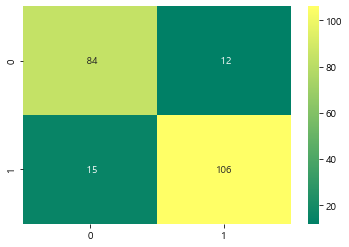

In [383]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(cv_predict, y_cv),annot=True,fmt='3.0f',cmap="summer")

In [388]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

ada=AdaBoostClassifier()
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}
grid_search_ABC=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='accuracy',n_jobs=1)

# run grid search
grid_search_ABC.fit(X_cv, y_cv)
cv_Ada_best = grid_search_ABC.best_estimator_

In [389]:
grid_search_ABC

AdaBoostClassifier(learning_rate=0.01, n_estimators=1000)

In [396]:
# add naive feature
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss

feat_cnt = 5
train_Y = train_y

def gen_nb_feats(rnd=1):
    
    help_tfidf_train,help_tfidf_test = np.zeros((54879,5)),np.zeros((19617,5))
    help_tfidf_train2,help_tfidf_test2 = np.zeros((54879,5)),np.zeros((19617,5))
    help_cnt1_train,help_cnt1_test = np.zeros((54879,5)),np.zeros((19617,5))
    help_cnt2_train,help_cnt2_test = np.zeros((54879,5)),np.zeros((19617,5))

    skf = StratifiedKFold(n_splits=feat_cnt, shuffle=True, random_state=23*rnd)
    for train_index, test_index in skf.split(train_tfidf,train_Y):
        # tfidf to nb
        X_train, X_test = train_tfidf[train_index], train_tfidf[test_index]
        y_train, y_test = train_Y[train_index], train_Y[test_index]
        tmp_model = MultinomialNB(alpha=0.025,fit_prior=False)
        tmp_model.fit(X_train,y_train)
        tmp_train_feat = tmp_model.predict_proba(X_test)
        tmp_test_feat = tmp_model.predict_proba(test_tfidf)
        help_tfidf_train[test_index] = tmp_train_feat
        help_tfidf_test += tmp_test_feat/feat_cnt

        # tfidf to nb
        X_train, X_test = train_tfidf2[train_index], train_tfidf2[test_index]
        tmp_model = MultinomialNB(0.025,fit_prior=False)
        tmp_model.fit(X_train,y_train)
        tmp_train_feat = tmp_model.predict_proba(X_test)
        tmp_test_feat = tmp_model.predict_proba(test_tfidf2)
        help_tfidf_train2[test_index] = tmp_train_feat
        help_tfidf_test2 += tmp_test_feat/feat_cnt

        # count vec to nb
        X_train, X_test = train_cvec[train_index], train_cvec[test_index]
        tmp_model = MultinomialNB(0.025,fit_prior=False)
        tmp_model.fit(X_train,y_train)
        tmp_train_feat = tmp_model.predict_proba(X_test)
        tmp_test_feat = tmp_model.predict_proba(test_cvec)
        help_cnt1_train[test_index] = tmp_train_feat
        help_cnt1_test += tmp_test_feat/feat_cnt

        # count vec2 to nb 
        X_train, X_test = train_cvec2[train_index], train_cvec2[test_index]
        tmp_model = MultinomialNB(0.025,fit_prior=False)
        tmp_model.fit(X_train,y_train)
        tmp_train_feat = tmp_model.predict_proba(X_test)
        tmp_test_feat = tmp_model.predict_proba(test_cvec2)
        help_cnt2_train[test_index] = tmp_train_feat
        help_cnt2_test += tmp_test_feat/feat_cnt
    
    help_train_feat = np.hstack([help_tfidf_train,help_tfidf_train2,help_cnt1_train,help_cnt2_train])
    help_test_feat = np.hstack([help_tfidf_test,help_tfidf_test2,help_cnt1_test,help_cnt2_test])

    return help_train_feat,help_test_feat
    
help_train_feat,help_test_feat = gen_nb_feats(1)
help_train_feat2,help_test_feat2 = gen_nb_feats(2)
help_train_feat3,help_test_feat3 = gen_nb_feats(3)

ValueError: Found input variables with inconsistent numbers of samples: [908, 131]

In [ ]:
best_3 = compare_models(sort = 'AUC', n_select = 3)  # 모델 성능 비교

In [69]:
'''
import xgboost as xgb
from sklearn import ensemble, metrics, model_selection, naive_bayes

def runXGB(train_X, train_y, test_X, test_y=None, test_X2=None, seed_val=0, child=1, colsample=0.3):
    param = {}
    param['objective'] = 'multi'
    param['eta'] = 0.1
    param['max_depth'] = 3
    param['silent'] = 1
    param['num_class'] = 5
    param['eval_metric'] = "mlogloss"
    param['min_child_weight'] = child
    param['subsample'] = 0.8
    param['colsample_bytree'] = colsample
    param['seed'] = seed_val
    num_rounds = 2000

    plst = list(param.items())
    xgtrain = xgb.DMatrix(train_X, label=train_y)

    if test_y is not None:
        xgtest = xgb.DMatrix(test_X, label=test_y)
        watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
        model = xgb.train(plst, xgtrain, num_rounds, watchlist, early_stopping_rounds=50, verbose_eval=20)
    else:
        xgtest = xgb.DMatrix(test_X)
        model = xgb.train(plst, xgtrain, num_rounds)

    pred_test_y = model.predict(xgtest, ntree_limit = model.best_ntree_limit)
    if test_X2 is not None:
        xgtest2 = xgb.DMatrix(test_X2)
        pred_test_y2 = model.predict(xgtest2, ntree_limit = model.best_ntree_limit)
    return pred_test_y, pred_test_y2, model
    
pred_lst = []
for i in range(len(pred_full_test)):
    pred_lst.append(np.argmax(pred_full_test[i]))
    
'''

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(pred_lst, test_y))